In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "EVChargingStationUsage.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "venkatsairo4899/ev-charging-station-usage-of-california-city",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-2396180521.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 11.4M/11.4M [00:00<00:00, 65.8MB/s]

Extracting zip of EVChargingStationUsage.csv...



/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [ ]:
duplicates = df[df.duplicated(keep=False)]
duplicates

df.drop_duplicates(inplace=True)
df.shape

(259411, 33)

In [ ]:
df.groupby('Station Name').size().sort_values(ascending=False)

,0
Station Name,
PALO ALTO CA / HAMILTON #2,23721
PALO ALTO CA / HAMILTON #1,14888
PALO ALTO CA / WEBSTER #1,14432
PALO ALTO CA / BRYANT #2,14388
PALO ALTO CA / HIGH #4,13898
PALO ALTO CA / BRYANT #1,13436
PALO ALTO CA / WEBSTER #2,12669
PALO ALTO CA / CAMBRIDGE #1,11163
PALO ALTO CA / HIGH #1,10756


In [ ]:
# prompt: I want to group df by the station name column, then list out all the unique values for column Port Number

print(df.groupby('Station Name')['Port Number'].unique())

Station Name
PALO ALTO CA / BRYANT # 1            [1]
PALO ALTO CA / BRYANT #1          [2, 1]
PALO ALTO CA / BRYANT #2          [2, 1]
PALO ALTO CA / BRYANT #3          [2, 1]
PALO ALTO CA / BRYANT #4          [1, 2]
PALO ALTO CA / BRYANT #5          [1, 2]
PALO ALTO CA / BRYANT #6          [1, 2]
PALO ALTO CA / CAMBRIDGE #1       [2, 1]
PALO ALTO CA / CAMBRIDGE #2       [2, 1]
PALO ALTO CA / CAMBRIDGE #3       [1, 2]
PALO ALTO CA / CAMBRIDGE #4       [1, 2]
PALO ALTO CA / CAMBRIDGE #5       [1, 2]
PALO ALTO CA / HAMILTON #1        [2, 1]
PALO ALTO CA / HAMILTON #2        [2, 1]
PALO ALTO CA / HIGH #1            [2, 1]
PALO ALTO CA / HIGH #2            [2, 1]
PALO ALTO CA / HIGH #3            [2, 1]
PALO ALTO CA / HIGH #4            [2, 1]
PALO ALTO CA / MPL #1                [1]
PALO ALTO CA / MPL #2                [1]
PALO ALTO CA / MPL #3                [1]
PALO ALTO CA / MPL #4                [1]
PALO ALTO CA / MPL #5                [1]
PALO ALTO CA / MPL #6                [1]
PAL

In [ ]:
import pandas as pd
df['Start Date'] =  pd.to_datetime(df['Start Date'])
df['Start Date']


df['End Date'] = pd.to_datetime(df['End Date'], errors = 'coerce')
df['End Date'].isna()

bad_rows_index = df['End Date'].isna()
bad_rows = df[bad_rows_index]


df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])

bad_rows = df['End Date'].isna()
df.loc[bad_rows, 'End Date'] = df.loc[bad_rows, 'Start Date'] + df.loc[bad_rows, 'Total Duration (hh:mm:ss)']

bad_rows_corrected = df[bad_rows_index]
bad_rows_corrected

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
116186,PALO ALTO CA / TED THOMPSON #1,0024:B100:0002:1323,City of Palo Alto,2017-04-20 13:09:00,PDT,2017-04-20 19:26:46,PDT,42845.81041,0 days 06:17:46,3:39:31,...,-122.144188,USD,0.00,Plug Out at Vehicle,3535,95008.0,381525,Santa Clara County,1.427410e+11,CT4020-HD-GW
116193,PALO ALTO CA / HIGH #2,0024:B100:0002:5959,City of Palo Alto,2017-04-20 14:05:00,PDT,2017-04-20 17:54:40,PDT,42845.74656,0 days 03:49:40,2:36:34,...,-122.163017,USD,0.00,Customer,781,94538.0,522899,Santa Clara County,1.640410e+11,CT4020-HD
116196,PALO ALTO CA / HIGH #3,0024:B100:0002:5939,City of Palo Alto,2017-04-20 14:10:00,PDT,2017-04-20 19:03:06,PDT,42845.79442,0 days 04:53:06,4:02:26,...,-122.163033,USD,0.00,Plug Out at Vehicle,824,94087.0,172943,Santa Clara County,1.640410e+11,CT4020-HD
116197,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2017-04-20 14:15:00,PDT,2017-04-20 19:09:39,PDT,42845.7988,0 days 04:54:39,2:01:02,...,-122.146065,USD,0.00,Plug Out at Vehicle,4142,94015.0,364595,Santa Clara County,1.427410e+11,CT4020-HD-GW
116198,PALO ALTO CA / HIGH #2,0024:B100:0002:5959,City of Palo Alto,2017-04-20 14:16:00,PDT,2017-04-20 19:03:49,PDT,42845.79486,0 days 04:47:49,2:34:38,...,-122.163017,USD,0.00,Plug Out at Vehicle,782,94538.0,667571,Santa Clara County,1.640410e+11,CT4020-HD
116204,PALO ALTO CA / HIGH #3,0024:B100:0002:5939,City of Palo Alto,2017-04-20 14:55:00,PDT,2017-04-20 16:14:36,PDT,42845.67721,0 days 01:19:36,1:18:59,...,-122.163033,USD,0.00,Plug Out at Vehicle,1492725326,10065.0,727715,Santa Clara County,1.640410e+11,CT4020-HD
116205,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2017-04-20 15:01:00,PDT,2017-04-20 18:15:48,PDT,42845.76144,0 days 03:14:48,3:14:30,...,-122.160370,USD,0.00,Plug Out at Vehicle,1492725681,94582.0,217693,Santa Clara County,1.119100e+11,CT2100-HD-CDMA-CCR
116206,PALO ALTO CA / TED THOMPSON #1,0024:B100:0002:1323,City of Palo Alto,2017-04-20 15:12:00,PDT,2017-04-20 18:16:40,PDT,42845.76211,0 days 03:04:40,3:04:23,...,-122.144188,USD,0.00,Customer,3536,94086.0,308001,Santa Clara County,1.427410e+11,CT4020-HD-GW
116209,PALO ALTO CA / MPL #5,000D:6F00:0154:FFC5,City of Palo Alto,2017-04-20 15:18:00,PDT,2017-04-20 17:12:06,PDT,42845.71706,0 days 01:54:06,1:54:00,...,-122.113487,USD,0.00,Plug Out at Vehicle,4102,94303.0,456553,San Mateo County,1.140100e+11,CT2000-HD-CCR
116211,PALO ALTO CA / BRYANT #3,000D:6F00:009E:D39E,City of Palo Alto,2017-04-20 15:24:00,PDT,2017-04-20 16:53:15,PDT,42845.70421,0 days 01:29:15,1:29:04,...,-122.162109,USD,0.00,Plug Out at Vehicle,11410,94043.0,168549,Santa Clara County,1.048100e+11,CT2100-HD-CCR


In [ ]:
## Start Time and End Time are converted to UTC
def convert_time(date, time_zone):
    if time_zone == 'PDT':
        # Explicitly PDT - use DST interpretation
        return date.tz_localize('US/Pacific',
                               ambiguous=True,
                               nonexistent='shift_forward').tz_convert('UTC')
    elif time_zone == 'PST':
        # Explicitly PST - use standard time interpretation
        return date.tz_localize('US/Pacific',
                               ambiguous=False,
                               nonexistent='shift_forward').tz_convert('UTC')
    else:
        return date.tz_localize('UTC')

df['Start Date'] = df.apply(lambda x: convert_time(x['Start Date'], x['Start Time Zone']), axis=1)
df['End Date'] = df.apply(lambda x: convert_time(x['End Date'], x['End Time Zone']), axis=1)


In [ ]:
df['Duration(mins)'] = df['Total Duration (hh:mm:ss)'].dt.total_seconds() / 60
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'])
df['Charging(mins)'] = df['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60




In [ ]:
df['Start Day'] = df['Start Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Start Month'] = df['Start Date'].dt.month # Month as number (1-12)
df['End Day'] = df['End Date'].dt.dayofweek
df['End Month'] = df['End Date'].dt.month
df['Start Hour of Day'] = df['Start Date'].dt.hour
df['End Hour of Day'] = df['End Date'].dt.hour



In [ ]:
df.isnull().sum()



,0
Station Name,0
MAC Address,0
Org Name,0
Start Date,0
Start Time Zone,0
End Date,0
End Time Zone,0
Transaction Date (Pacific Time),209
Total Duration (hh:mm:ss),0
Charging Time (hh:mm:ss),0


In [ ]:
##checking if all start dates and end dates are on the same day
df['is_equal'] = df.apply(lambda x: x['Start Day'] == x['End Day'], axis=1)
non_equal = df[~df['is_equal']]


In [ ]:
print(df['MAC Address'].nunique())



83


In [ ]:
import re
from collections import defaultdict
def count_unique_stations(df, station_column='Station Name'):
    """
    Count unique stations by extracting base station name and counting variations
    """
    base_stations = defaultdict(set)

    for station in df[station_column].dropna():
        station = str(station).strip()

        # Extract base station name (everything before the # and number)
        match = re.search(r'^(.+?)\s*#?\s*\d+\s*$', station)

        if match:
            base_station = match.group(1).strip()
            base_stations[base_station].add(station)

        else:
            base_stations[station].add(station)

    # Count unique variations for each base station
    return {base: len(variations) for base, variations in base_stations.items()}

station_counts = count_unique_stations(df, 'Station Name')

# View results
for base_station, count in station_counts.items():
    print(f"{base_station}: {count} stations")

PALO ALTO CA / HAMILTON: 2 stations
PALO ALTO CA / HIGH: 4 stations
PALO ALTO CA / BRYANT: 7 stations
PALO ALTO CA / MPL: 6 stations
PALO ALTO CA / RINCONADA LIB: 3 stations
PALO ALTO CA / WEBSTER: 3 stations
PALO ALTO CA / TED THOMPSON: 4 stations
PALO ALTO CA / CAMBRIDGE: 5 stations
PALO ALTO CA / SHERMAN: 13 stations


In [ ]:

station_counts['PALO ALTO CA / HAMILTON'] = 4
station_counts['PALO ALTO CA / HIGH'] = 8
station_counts['PALO ALTO CA / BRYANT'] = 13
station_counts['PALO ALTO CA / MPL'] = 6
station_counts['PALO ALTO CA / RINCONADA LIB'] = 6
station_counts['PALO ALTO CA / WEBSTER'] = 6
station_counts['PALO ALTO CA / TED THOMPSON'] = 8
station_counts['PALO ALTO CA / CAMBRIDGE'] = 10
station_counts['PALO ALTO CA / SHERMAN'] = 19

print(station_counts)

{'PALO ALTO CA / HAMILTON': 4, 'PALO ALTO CA / HIGH': 8, 'PALO ALTO CA / BRYANT': 13, 'PALO ALTO CA / MPL': 6, 'PALO ALTO CA / RINCONADA LIB': 6, 'PALO ALTO CA / WEBSTER': 6, 'PALO ALTO CA / TED THOMPSON': 8, 'PALO ALTO CA / CAMBRIDGE': 10, 'PALO ALTO CA / SHERMAN': 19}


In [ ]:
pattern = re.compile(r'^(.+?)\s*#?\s*\d+\s*$')
df['Base Station'] = df['Station Name'].str.extract(pattern, expand=False)




In [ ]:
import numpy as np

def calculate_utilization_vectorized(df, station_counts):
    # Extract datetime components
    start_datetimes = df['Start Date'].values  # Already in datetime format
    end_datetimes = df['End Date'].values      # Assuming you have an 'End Date' column
    stations = df['Base Station'].values

    # Extract numpy datetime64 arrays for vectorized operations
    start_np = start_datetimes.astype('datetime64[m]')  # minute precision
    end_np = end_datetimes.astype('datetime64[m]')

    # Initialize busy counts
    busy_counts = np.zeros(len(df), dtype=int)

    # Vectorized comparison
    for i in range(len(df)):
        # Find sessions with matching station
        same_station_mask = (stations == stations[i])

        # Current minute to check
        current_minute = start_np[i]

        # Count overlaps for current minute
        busy_counts[i] = np.sum(
            (start_np[same_station_mask] <= current_minute) &
            (current_minute < end_np[same_station_mask])
        )

    # Assign results
    df['Busy'] = busy_counts
    df['Utilization'] = df['Busy'] / df['Base Station'].map(station_counts)

    return df

calculate_utilization_vectorized(df, station_counts)



,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Start Day,Start Month,End Day,End Month,Start Hour of Day,End Hour of Day,is_equal,Base Station,Busy,Utilization
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 03:17:00+00:00,PDT,2011-07-30 06:20:00+00:00,PDT,7/29/2011 23:20,0 days 03:03:32,0 days 01:54:03,...,5,7,5,7,3,6,True,PALO ALTO CA / HAMILTON,1,0.250000
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 07:00:00+00:00,PDT,2011-07-30 07:02:00+00:00,PDT,7/30/2011 0:02,0 days 00:02:06,0 days 00:01:54,...,5,7,5,7,7,7,True,PALO ALTO CA / HAMILTON,1,0.250000
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 15:16:00+00:00,PDT,2011-07-30 19:34:00+00:00,PDT,7/30/2011 12:34,0 days 04:17:32,0 days 04:17:28,...,5,7,5,7,15,19,True,PALO ALTO CA / HAMILTON,1,0.250000
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 21:51:00+00:00,PDT,2011-07-30 23:55:00+00:00,PDT,7/30/2011 16:55,0 days 02:03:24,0 days 02:02:58,...,5,7,5,7,21,23,True,PALO ALTO CA / HAMILTON,1,0.250000
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-31 01:51:00+00:00,PDT,2011-07-31 03:03:00+00:00,PDT,7/30/2011 20:03,0 days 01:11:24,0 days 00:43:54,...,6,7,6,7,1,3,True,PALO ALTO CA / HAMILTON,1,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2021-01-01 00:39:00+00:00,PST,2021-01-01 01:14:00+00:00,PST,12/31/2020 17:16,0 days 00:35:44,0 days 00:35:18,...,4,1,4,1,0,1,True,PALO ALTO CA / TED THOMPSON,1,0.125000
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2021-01-01 00:48:00+00:00,PST,2021-01-01 04:31:00+00:00,PST,12/31/2020 20:32,0 days 03:43:01,0 days 02:14:04,...,4,1,4,1,0,4,True,PALO ALTO CA / WEBSTER,1,0.166667
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2021-01-01 01:28:00+00:00,PST,2021-01-01 18:56:00+00:00,PST,1/1/2021 10:57,0 days 17:28:14,0 days 05:08:12,...,4,1,4,1,1,18,True,PALO ALTO CA / MPL,2,0.333333
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2021-01-01 01:49:00+00:00,PST,2021-01-01 05:55:00+00:00,PST,12/31/2020 21:56,0 days 04:05:34,0 days 03:53:42,...,4,1,4,1,1,5,True,PALO ALTO CA / WEBSTER,2,0.333333


In [ ]:
df.to_csv('my_data.csv')

In [ ]:
days = df['Start Date'].dt.day.iloc[693]
months = df['Start Month'].iloc[693]
years = df['Start Date'].dt.year.iloc[693]
stations = df['Base Station'][693]
hour = df['Start Hour of Day'].iloc[693]


start = df['Start Date'].iloc[693]
print(days)
print(months)
print(years)
print(stations)
print(hour)
print(start)

7
11
2011
PALO ALTO CA / HAMILTON
22
2011-11-07 22:41:00+00:00


In [ ]:
df[(df['Base Station'] == stations) & (df['Start Date'] <= start) & (df['End Date'] > start)]

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Start Day,Start Month,End Day,End Month,Start Hour of Day,End Hour of Day,is_equal,Base Station,Busy,Utilization
691,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2011-11-07 21:51:00+00:00,PST,2011-11-07 22:50:00+00:00,PST,11/7/2011 14:50,0 days 00:58:45,0 days 00:58:44,...,0,11,0,11,21,22,True,PALO ALTO CA / HAMILTON,1,0.25
692,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-11-07 22:01:00+00:00,PST,2011-11-08 00:01:00+00:00,PST,11/7/2011 16:01,0 days 01:59:35,0 days 01:59:23,...,0,11,1,11,22,0,False,PALO ALTO CA / HAMILTON,2,0.50
693,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-11-07 22:41:00+00:00,PST,2011-11-07 23:02:00+00:00,PST,11/7/2011 15:02,0 days 00:20:47,0 days 00:19:44,...,0,11,0,11,22,23,True,PALO ALTO CA / HAMILTON,3,0.75


In [ ]:
# prompt: get rows with utilization column above .5

df[df['Utilization'] > 1]

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Start Day,Start Month,End Day,End Month,Start Hour of Day,End Hour of Day,is_equal,Base Station,Busy,Utilization
23168,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2014-06-26 18:26:00+00:00,PDT,2014-06-26 20:39:00+00:00,PDT,6/26/2014 14:12,0 days 02:13:07,0 days 02:12:51,...,3,6,3,6,18,20,True,PALO ALTO CA / HAMILTON,5,1.250000
23169,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2014-06-26 18:33:00+00:00,PDT,2014-06-26 21:58:00+00:00,PDT,6/26/2014 14:58,0 days 03:25:33,0 days 03:21:18,...,3,6,3,6,18,21,True,PALO ALTO CA / HAMILTON,6,1.500000
23174,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2014-06-26 20:52:00+00:00,PDT,2014-06-26 22:30:00+00:00,PDT,6/26/2014 15:31,0 days 01:38:50,0 days 01:12:10,...,3,6,3,6,20,22,True,PALO ALTO CA / HAMILTON,5,1.250000
28721,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2014-12-04 16:59:00+00:00,PST,2014-12-04 19:59:00+00:00,PST,12/4/2014 14:10,0 days 02:59:54,0 days 02:51:40,...,3,12,3,12,16,19,True,PALO ALTO CA / HAMILTON,5,1.250000
36082,PALO ALTO CA / MPL #3,000D6F00015B906A,City of Palo Alto,2015-05-04 16:05:00+00:00,PDT,2015-05-04 19:26:00+00:00,PDT,5/4/2015 12:26,0 days 03:21:12,0 days 02:37:00,...,0,5,0,5,16,19,True,PALO ALTO CA / MPL,7,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93401,PALO ALTO CA / MPL #5,000D:6F00:0154:FFC5,City of Palo Alto,2016-11-12 15:58:00+00:00,PST,2016-11-12 16:52:00+00:00,PST,11/12/2016 10:08,0 days 00:53:35,0 days 00:53:25,...,5,11,5,11,15,16,True,PALO ALTO CA / MPL,7,1.166667
93403,PALO ALTO CA / MPL #6,000D:6F00:015B:7509,City of Palo Alto,2016-11-12 16:06:00+00:00,PST,2016-11-12 16:59:00+00:00,PST,11/12/2016 10:08,0 days 00:53:35,0 days 00:50:34,...,5,11,5,11,16,16,True,PALO ALTO CA / MPL,7,1.166667
93406,PALO ALTO CA / MPL #3,000D:6F00:015B:906A,City of Palo Alto,2016-11-12 16:21:00+00:00,PST,2016-11-12 19:47:00+00:00,PST,11/12/2016 11:47,0 days 03:25:37,0 days 03:25:16,...,5,11,5,11,16,19,True,PALO ALTO CA / MPL,7,1.166667
93419,PALO ALTO CA / MPL #5,000D:6F00:0154:FFC5,City of Palo Alto,2016-11-12 17:47:00+00:00,PST,2016-11-12 20:18:00+00:00,PST,11/12/2016 12:18,0 days 02:31:35,0 days 02:27:30,...,5,11,5,11,17,20,True,PALO ALTO CA / MPL,7,1.166667


In [ ]:
df.shape

(259411, 45)

In [ ]:
# prompt: get first row column 'Start Day'

first_row_start_day = df['Start Day'].iloc[0]
first_row_start_day


np.int32(5)

In [ ]:
# prompt: change working directory to mydrive

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# prompt: return the rows in a dataframe that match  x in the Day column, y in the Month column, z in the year column

def filter_dataframe_by_date(df, day, month, year):
  """
  Filters the dataframe to return rows matching the specified day, month, and year
  in the 'Start Date' column.

  Args:
    df: The input pandas DataFrame.
    day: The day to filter by.
    month: The month to filter by.
    year: The year to filter by.

  Returns:
    A new DataFrame containing the filtered rows.
  """
  filtered_df = df[(df['Start Date'].dt.day == day) &
                   (df['Start Date'].dt.month == month) &
                   (df['Start Date'].dt.year == year)]
  return filtered_df

# Example usage:
# Replace x, y, and z with the actual day, month, and year you want to filter by.
# filtered_rows = filter_dataframe_by_date(df, x, y, z)
# filtered_rows

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

y = df['Utilization']
x = df.drop(columns=['Utilization'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'PALO ALTO CA / MPL #4'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('my_data3.csv')

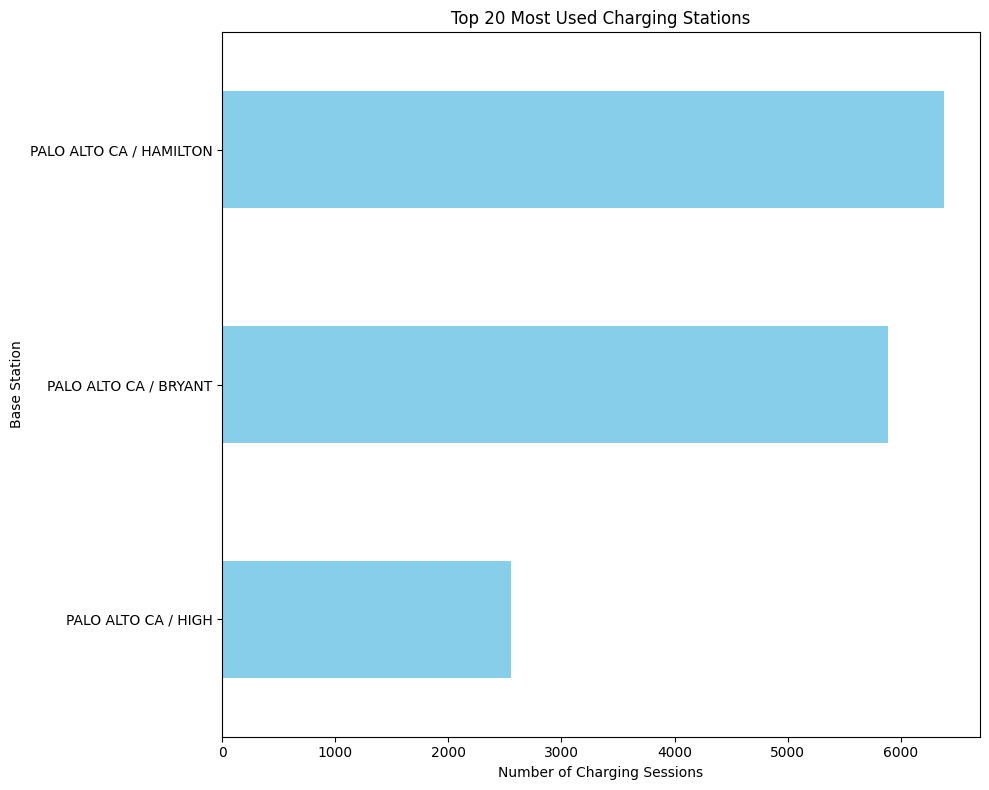

In [ ]:
import matplotlib.pyplot as plt

station_counts = df['Base Station'].value_counts().head(20)  # Top 20 busiest
station_counts.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.xlabel("Number of Charging Sessions")
plt.ylabel("Base Station")
plt.title("Top 20 Most Used Charging Stations")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


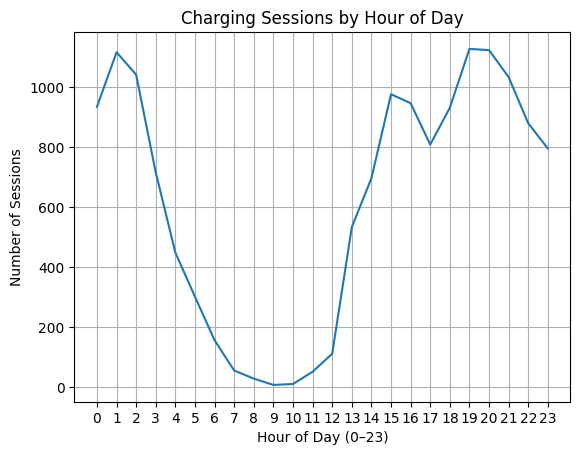

In [ ]:
import seaborn as sns

hourly_usage = df.groupby('Start Hour of Day').size()
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values)
plt.title("Charging Sessions by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Sessions")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


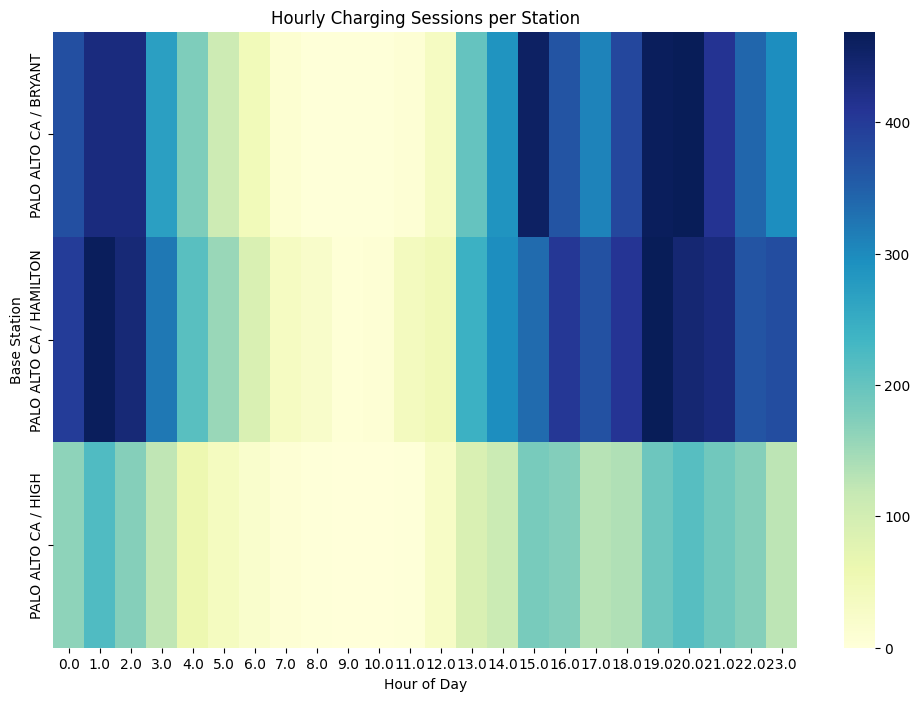

In [ ]:
heat_df = df.groupby(['Base Station', 'Start Hour of Day']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heat_df, cmap="YlGnBu")
plt.title("Hourly Charging Sessions per Station")
plt.xlabel("Hour of Day")
plt.ylabel("Base Station")
plt.show()


In [ ]:
top_stations = df['Base Station'].value_counts().head(10).index
heat_df = df[df['Base Station'].isin(top_stations)].groupby(['Base Station', 'Start Hour of Day']).size().unstack(fill_value=0)


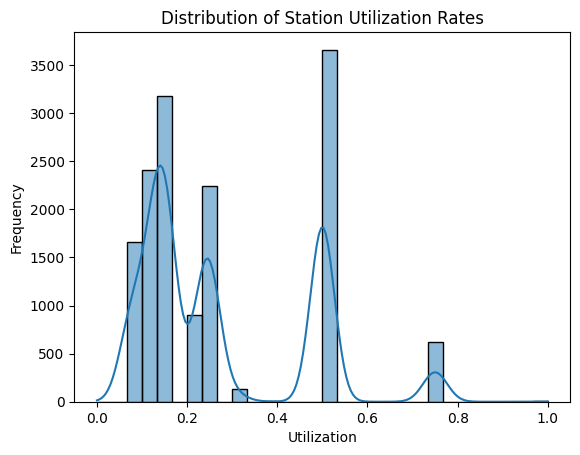

In [ ]:
import seaborn as sns
sns.histplot(df['Utilization'], bins=30, kde=True)
plt.title("Distribution of Station Utilization Rates")
plt.xlabel("Utilization")
plt.ylabel("Frequency")
plt.show()